a- Download the dataset “Digit” from CSNS. Check out the dataset. It includes 1797 small images (8x8 pixels), each one includes a hand-written digit (0-9). You have to download the corresponding csv file that includes the labels of the images. The goal is to build a Machine Learning Algorithm that can recognize the hand-written digits!

[[  0   2  88 217 158  21   0   0]
 [ 16   0 228 236 166 253  95   0]
 [  0  41 255  44  11 182 132   3]
 [ 11  80 220   0   2 143 133   5]
 [  6  71 122   0   5 155 140   0]
 [  0  76 194   0  26 207 105  15]
 [  0  18 255  83 146 211   4   0]
 [  4   3  87 228 182   0   9   2]]


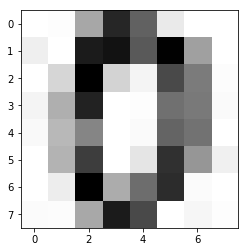

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

file_name = "./Digit/0.jpg"

%matplotlib inline
image_name = mpimg.imread(file_name)
print(image_name)
plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')


b- Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 feature columns.

In [48]:

# 1796
import pandas as pd

label = pd.read_csv("./label.csv")

#flat_list = [item for sublist in l for item in sublist]
columns = [x for x in range(64)]
columns.append("number")


label_df = pd.DataFrame(columns = columns)

for x in range(len(label)):
    file_name = "./Digit/" + str(label["name of the file"][x]) + ".jpg"
    image_name = mpimg.imread(file_name)
    image = [item for sublist in image_name for item in sublist]
    image.append(label["digit label"][x])
    label_df.loc[len(label_df)] = image
print(label_df.head())
    


   0  1    2    3    4    5   6  7   8    9  ...   55 56  57   58   59   60  \
0  0  2   88  217  158   21   0  0  16    0  ...    0  4   3   87  228  182   
1  0  0   11  187  210   78   5  0  13    5  ...    0  0   0    0  172  251   
2  0  0    5   59  240  199   2  0   5    0  ...    0  0  11    0   54  173   
3  6  0  108  255  213   13  10  0   2  131  ...    1  0   0  118  217  226   
4  0  6    0   34  160    7   7  0   5    0  ...    0  0   0    2   42  250   

    61   62  63 number  
0    0    9   2      0  
1  157    0  12      1  
2  255  138   0      2  
3  159    0   3      3  
4   51    0   4      4  

[5 rows x 65 columns]


c- Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2.

In [63]:
from sklearn.model_selection import train_test_split
import numpy as np

feature_cols = [x for x in range(64)]

X = label_df[feature_cols]

y = np.asarray(label_df["number"], dtype="|S6")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)


d- Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (c). Use this command to import and define your classifier:
from sklearn.ensemble import RandomForestClassifier
my_RandomForest =
RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
  
Use my_RandomForest.fit for training your random forest classifier and my_RandomForest.predict for prediction. Test your Machine Learning Algorithm on testing set (from part(c)), and calculate and report the accuracy.

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

my_RandomForest.fit(X_train, y_train)
y_predict_rf = my_RandomForest.predict(X_test)


score_lr = accuracy_score(y_test, y_predict_rf)

print(score_lr)

0.9277777777777778


e- Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set. Then, use the following command to show the misclassified images:
plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')


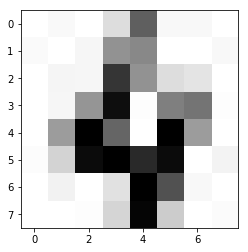

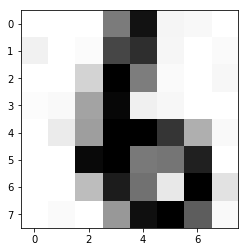

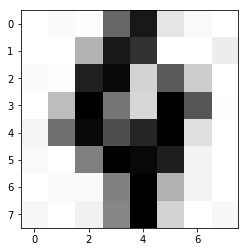

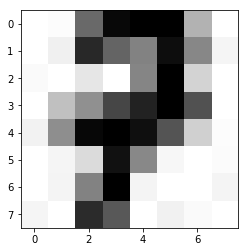

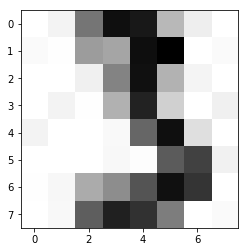

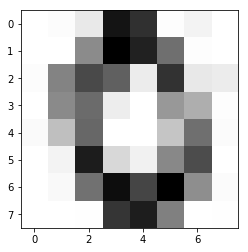

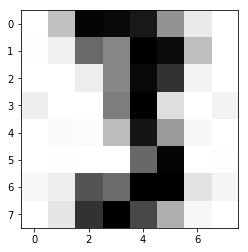

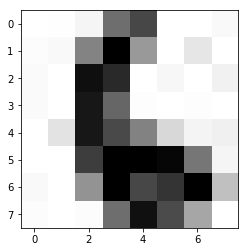

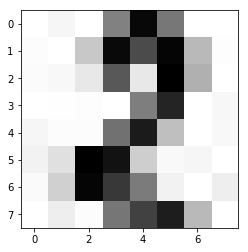

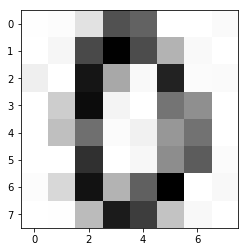

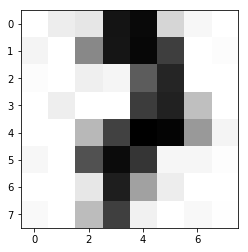

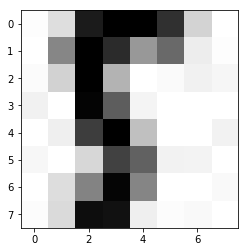

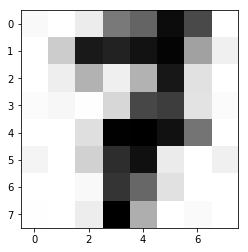

In [79]:
for x in range(len(y_test)):
    if y_test[x] != y_predict_rf[x]:
        file_name = "./Digit/" + str(label["name of the file"][x]) + ".jpg"
        image_name = mpimg.imread(file_name)
        plt.figure()
        plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')
    